In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def sales_in_range(data, r):
    x = np.array([]); y = np.array([])
    for i in range(0,1941,r):
        if (i + r <= 1941):
            x = np.append(x, i // r + 1)
            y = np.append(y, sum(data[i:i+r]))
    return x, y
def get_sell_plot(rows):
    price_plot_x, price_plot_y = range(1,283), [0] * 282 
    for index, row in rows.iterrows():
        yr, wk = int(str(row['wm_yr_wk'])[1:3]), int(str(row['wm_yr_wk'])[3:]) 
        price_plot_y[52 * (yr - 11) + wk - 25] = row['sell_price'] + price_plot_y[52 * (yr - 11) + wk - 25]
    return price_plot_x, price_plot_y

In [3]:
data = pd.read_csv('data/sales_train_evaluation.csv')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


## Linear Fitting for 20% TEST

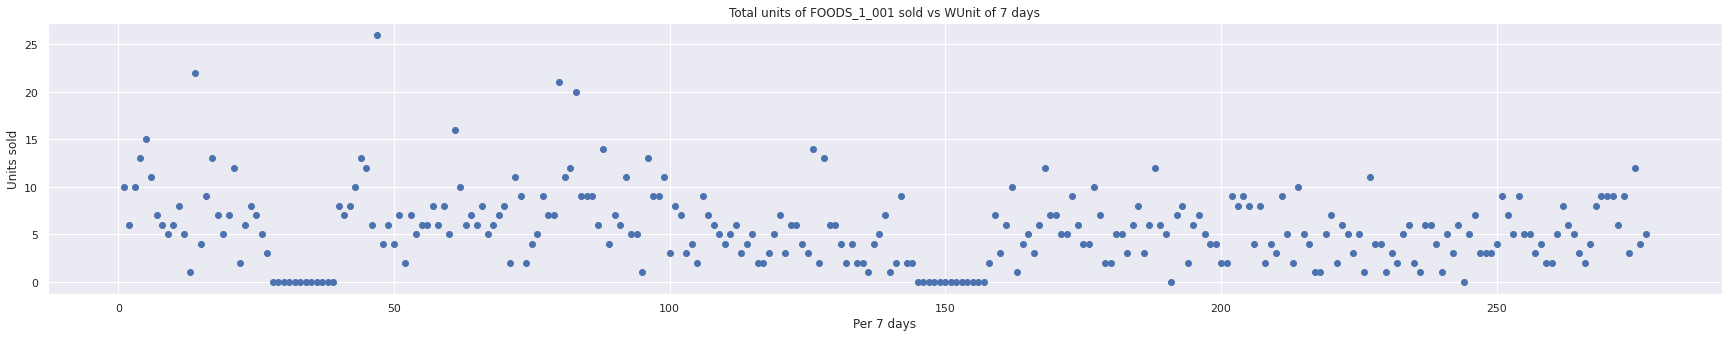

In [4]:
item_id = 'FOODS_1_001'
example = data[(data['item_id'] == item_id) & (data['store_id'] == 'CA_1')].to_numpy()[0][6:]
fig = plt.figure(figsize=(30,5))
r = 7; start = 0
x, y = sales_in_range(example, r)
plt.scatter(x[start:], y[start:])
plt.xlabel(f'Per {r} days')
plt.ylabel('Units sold')
plt.title(f'Total units of {item_id} sold vs WUnit of {r} days')
plt.show()

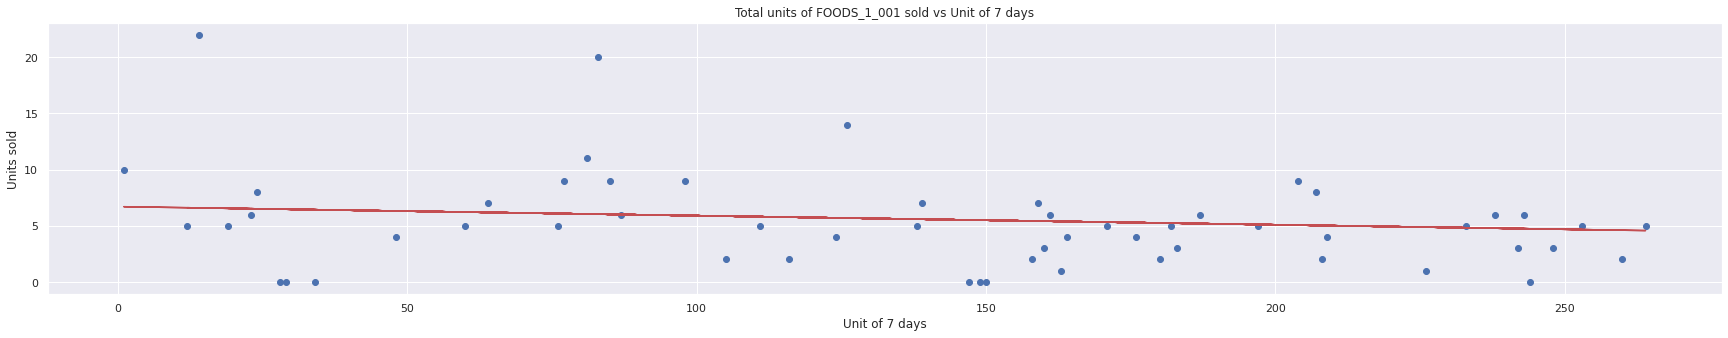

In [5]:

x, y = np.array(x).reshape(-1,1)[start:], np.array(y).reshape(-1,1)[start:]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.figure(figsize=(30, 5))
plt.scatter(X_test[start:], y_test[start:])
plt.plot(X_test[start:], y_pred[start:], '-r')
plt.xlabel(f'Unit of {r} days')
plt.ylabel('Units sold')
plt.title(f'Total units of {item_id} sold vs Unit of {r} days')
plt.show()

In [6]:
reg.score(X_test, y_test)

0.05458118572614179